In [1]:
# plot code for figureS18
# useful packages:
import matplotlib.gridspec as gridspec
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")
import pickle
from PIL import Image
from scipy.stats import pearsonr
import scipy.stats as stats
import statsmodels.stats.multitest as multi
import seaborn as sns
import pandas as pd

In [2]:
num_imgs = 2025

imgs_mat = scipy.io.loadmat('imgs.mat')
imgs = list(imgs_mat.values())
imgs = imgs[3].T

In [3]:
# start settings:
figname = 'figureS18'
# conditions of the network
conds = ['3D_objects_trained',
        '3D_objects_untrained',
        ]
panels = ['A','B']

num_imgs = 2025
ncatg = 9
num_catg_imgs = 225
fc6_idx = 5

# main setting
xtlbs = ['car','boat','face','chair','airplane','tool','animal','fruit','flower']
n = len(xtlbs) # number of layers: 7 or 5
lstyl = '-' # '--', '-'
panel = 'F'
cond = 'r_himgs' # 1:r_himgs, 2:r_vimgs, 3:r_r90imgs, 4:r_himgs_hfmap, 5:r_vimgs_vfmap, 6:r_r90imgs_rfmap, 
color = [0,0,0] # 1:[0.9294,0.1373,0.1647] ,2:[0.1059,0.7373,0.6078], 3: [0,0.298,0.5608], 
annots = False # annotations

# figure 
msz = 3
lw = 0.2
y_pos = [-0.5,0,0.5,1]
x_pos = np.array(np.arange(9),dtype='int64')

# save figure flag
savefig = 1

# font
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 6 # 6
plt.rcParams['axes.linewidth'] = 0.8 # 0.8

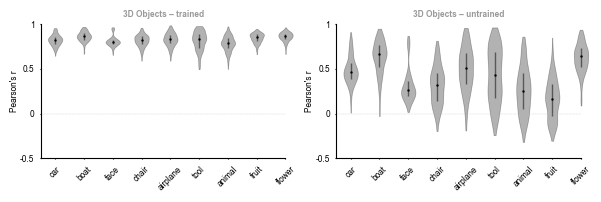

In [4]:
ncols = 2
nrows = 1
fig, axs = plt.subplots(nrows, ncols, figsize=(6,2))

# load the correlation files
for i, ax in enumerate(axs):
    with open('figure3'+panels[i]+'_corr_invaraince_euqivaraince_zscored_'+conds[i]+'_'+str(num_imgs)+'.csv','rb') as fp:
        data_dict = pickle.load(fp)

    # Add axes which can span multiple grid boxes


    data = np.reshape(data_dict[cond][:,fc6_idx],(ncatg,num_catg_imgs))

    parts = ax.violinplot(np.transpose(data),x_pos,showmeans=False, showmedians=False, showextrema=False)

    for pc in parts['bodies']:
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
        pc.set_alpha(0.3)
        pc.set_linestyles(lstyl)
        pc.set_linewidths(0.5)
        pc.set_clip_on(False)

    quartile1, medians, quartile3 = np.percentile(data,[25,50,75],axis=1)
    ax.scatter(x_pos, medians, marker='o', color=color, s=0.5, zorder=3, clip_on=False)
    ax.vlines(x_pos, quartile1, quartile3, color=color, linestyle='-', lw=1, alpha= 0.5, clip_on=False)
    ax.hlines(0,-0.5,9.5, color=[0.7,0.7,0.7], linestyle='--', lw=0.2, clip_on=True)

    # set x axis
    ax.set_xticks(x_pos)
    ax.set_xlim([-0.5,n-1.0])
    ax.set_xticklabels(xtlbs,rotation = 45,)

    # set y axis
    ax.set_yticks(y_pos)
    ax.set_ylim((-0.5,1))
    ax.set_yticklabels(y_pos)
    
    # set ylabel
    ax.set_ylabel("Pearson's r",labelpad=0.8)

    # # set panels name
    # if annots == True:
    if i == 0:
        ax.set_title('3D Objects \u2013 trained',pad = 7,
                    fontdict = {'fontsize': 6,
                        'fontweight': 'bold',
                        'color': [0.6,0.6,0.6],
                        'verticalalignment': 'center',
                        'horizontalalignment': 'center'})
    if i == 1:
        ax.set_title('3D Objects \u2013 untrained',pad = 7,
                    fontdict = {'fontsize': 6,
                        'fontweight': 'bold',
                        'color': [0.6,0.6,0.6],
                        'verticalalignment': 'center',
                        'horizontalalignment': 'center'})

        
    # remove top and right lines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # set tick params
    ax.tick_params(length = 1, width = 0.8)

# Save the figure and show
if savefig == 1:
    plt.tight_layout()
    plt.savefig(figname + '.pdf',
                dpi=300,bbox_inches='tight',facecolor='w',pad_inches=0.01)